In [1]:
using Pkg
Pkg.activate("c:/Users/FLEX/StochProtocol")  # Ruta absoluta al proyecto

# Cargar StochProtocol
using StochProtocol
using StochProtocol.Explore.Run: run_protocol
using StochProtocol.Explore: plot_discrepancy_vs_p, plot_consensus_vs_p
using StochProtocol.Explore: results_table, plot_comparison

  Activating project at `c:\Users\FLEX\StochProtocol`


In [2]:
AMP = """
PROTOCOL AMP
PROCESSES: 2
STATE:
    x ∈ {0,1}
INITIAL VALUES:
    [0.0, 1.0]
PARAMETERS:
    y ∈ [0,1] = 0.5
CHANNEL:
    stochastic

UPDATE RULE:
    EACH ROUND:
        if received_diff then
            xᵢ ← y
        else
            xᵢ ← x
        end

METRICS:
    discrepancy
    consensus
"""


"PROTOCOL AMP\nPROCESSES: 2\nSTATE:\n    x ∈ {0,1}\nINITIAL VALUES:\n    [0.0, 1.0]\nPARAMETERS:\n    y ∈ [0,1] = 0.5\nCHANNEL:\n    stochastic\n\nUPDATE RULE:\n    EACH ROUND:\n        if received_diff then\n            xᵢ ← y\n        else\n            xᵢ ← x\n        end\n\nMETRICS:\n    discrepancy\n    consensus\n"

In [9]:
results = run_protocol(AMP; 
                       p_values=0.0:0.01:1.0,  # Rango
                       rounds=1, 
                       repetitions=100)  


Protocol: AMP | processes=2 rounds=1 reps=100 eps=1.0e-6
p span: 0.0..1.0 step≈0.01
Consensus peaks at p=1.0: 1.0
Lowest consensus at p=0.0: 0.0
Discrepancy min=0.0 max=1.0

Use results_table(results) for formatted output or table(results) for raw data.


In [10]:
results_table(results; protocol_name="AMP")



━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 RESULTS: AMP
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━



Row,p,E_D,P_consensus,Trials
,Float64,Float64,Float64,Int64
1,0.0,1.0,0.0,100
2,0.01,0.985,0.0,100
3,0.02,0.965,0.0,100
4,0.03,0.965,0.0,100
5,0.04,0.955,0.0,100
6,0.05,0.94,0.0,100
7,0.06,0.925,0.0,100
8,0.07,0.925,0.0,100
9,0.08,0.91,0.01,100


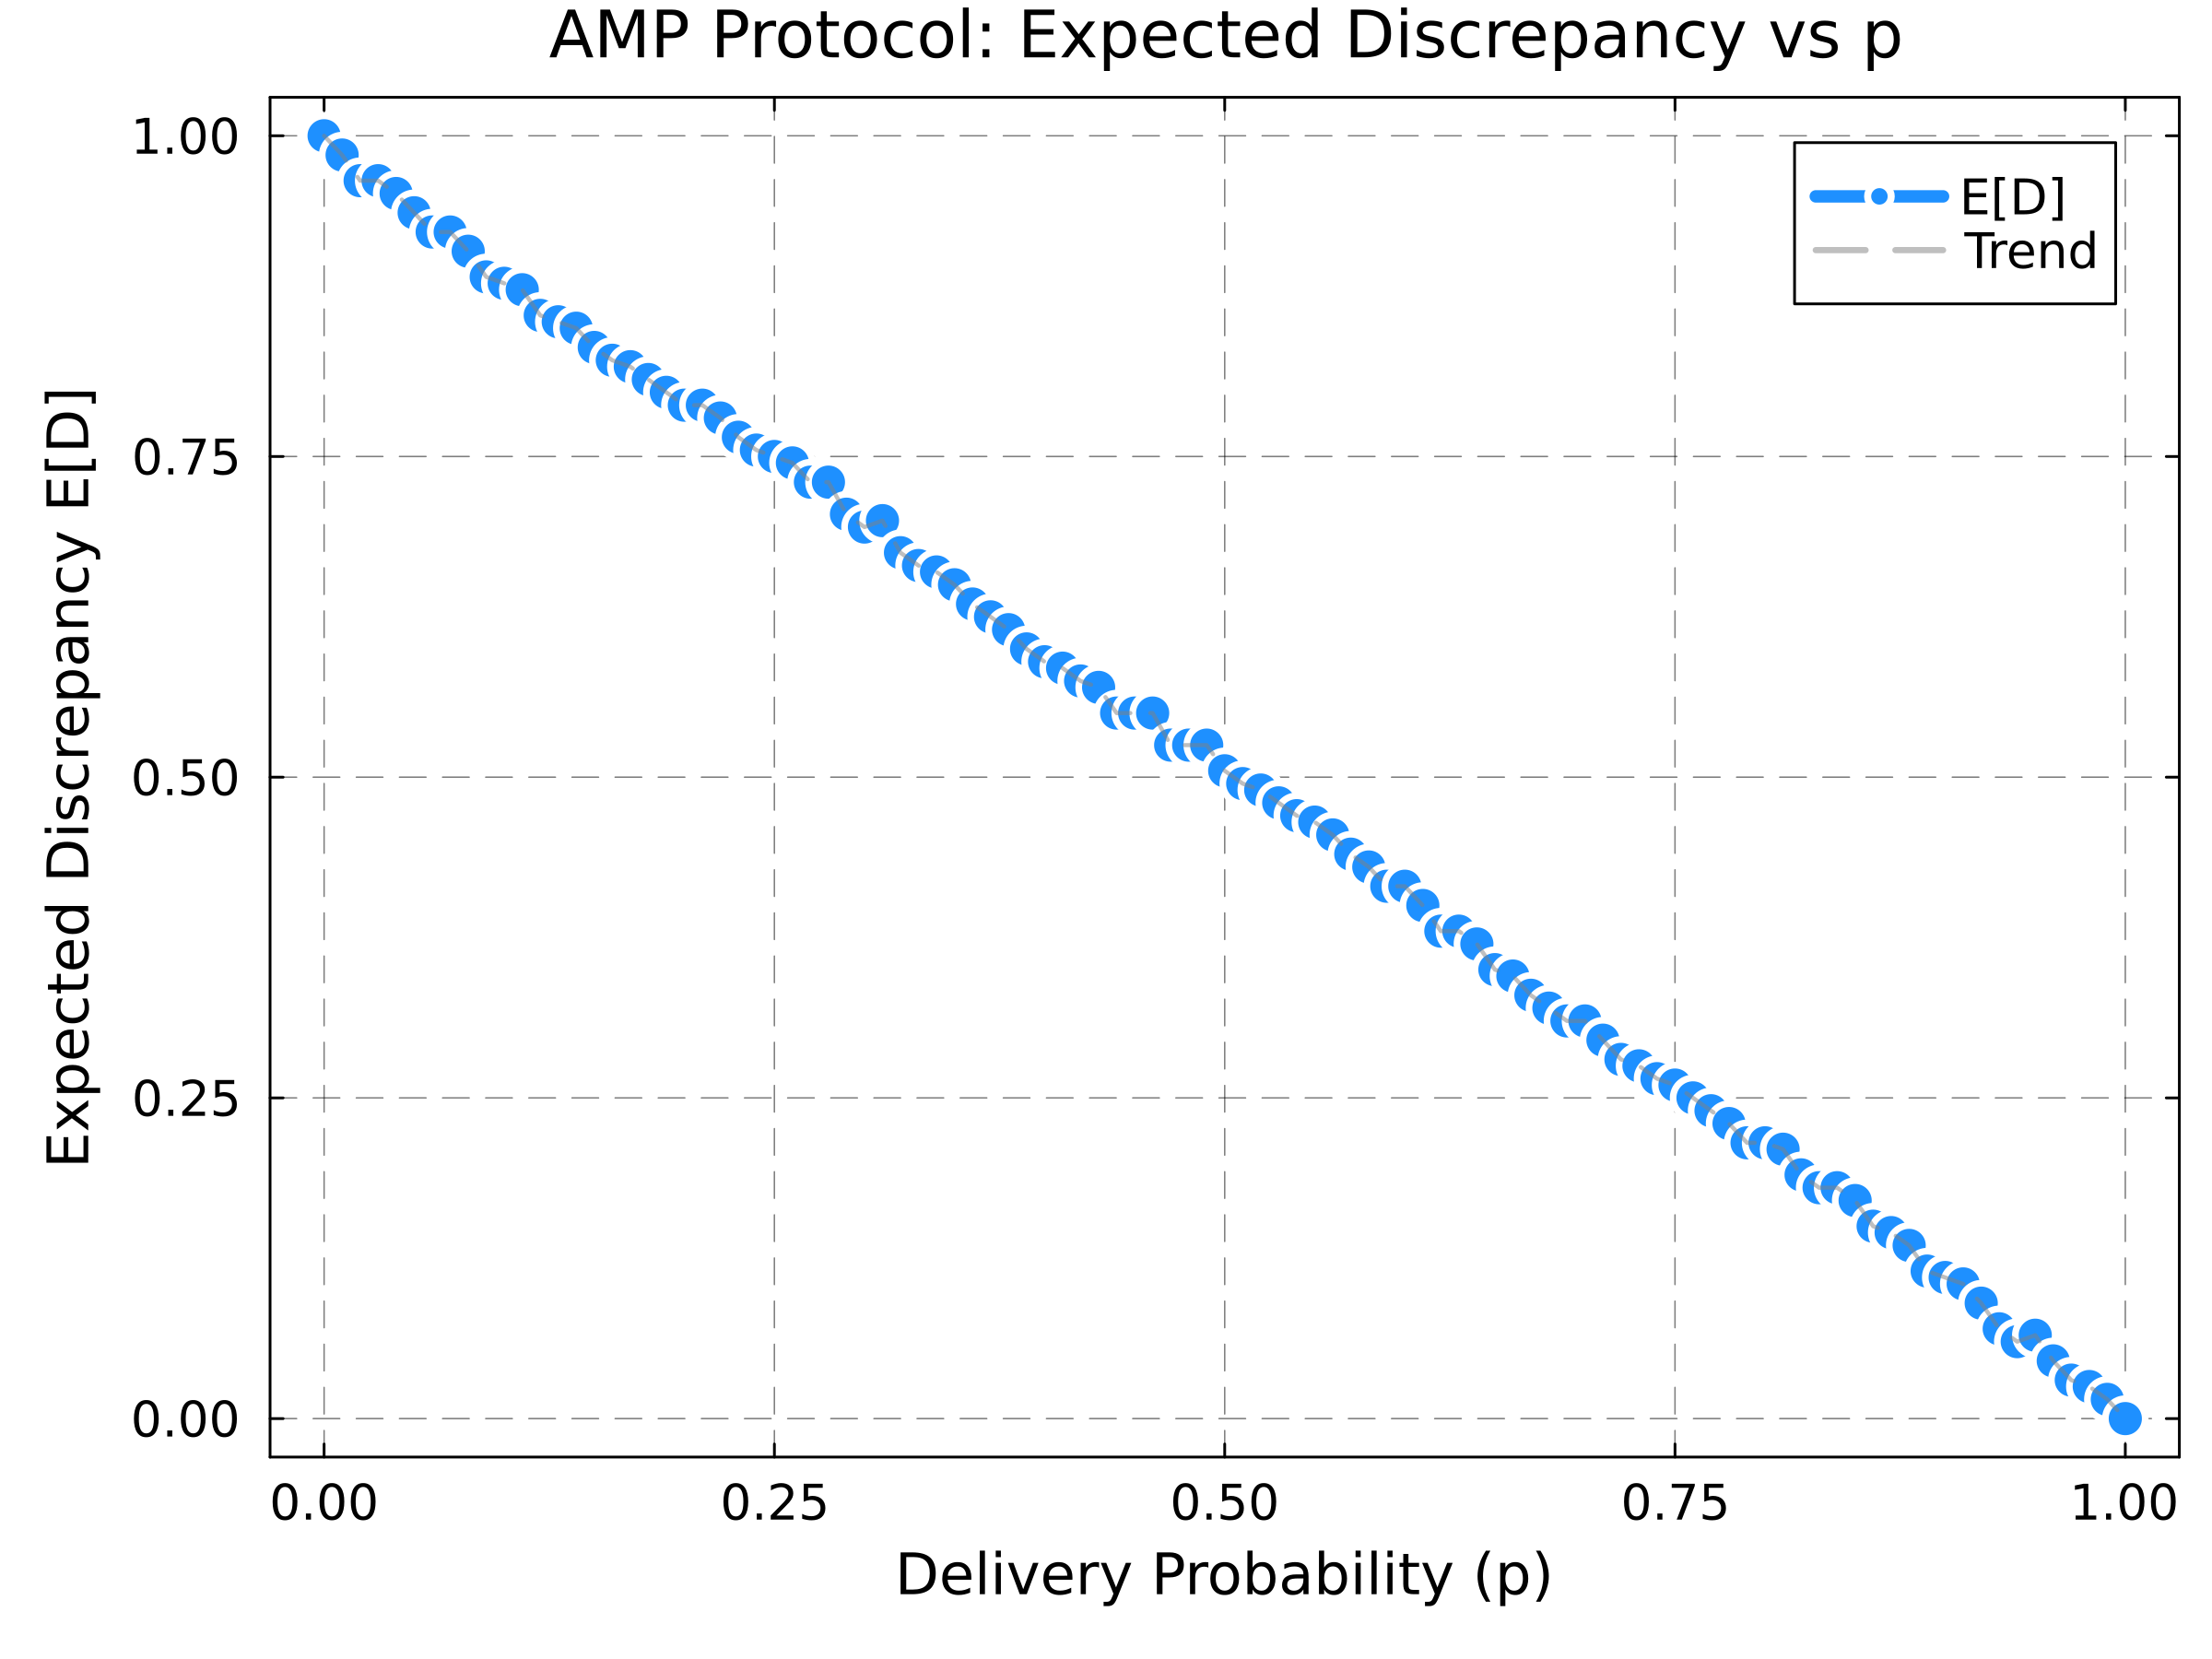

📊 Gráfica guardada en: amp_discrepancy.png


In [11]:
# Gráfica de E[D] vs p
plot_disc = plot_discrepancy_vs_p(results;
                                   title="AMP Protocol: Expected Discrepancy vs p",
                                   save_path="amp_discrepancy.png")
display(plot_disc)


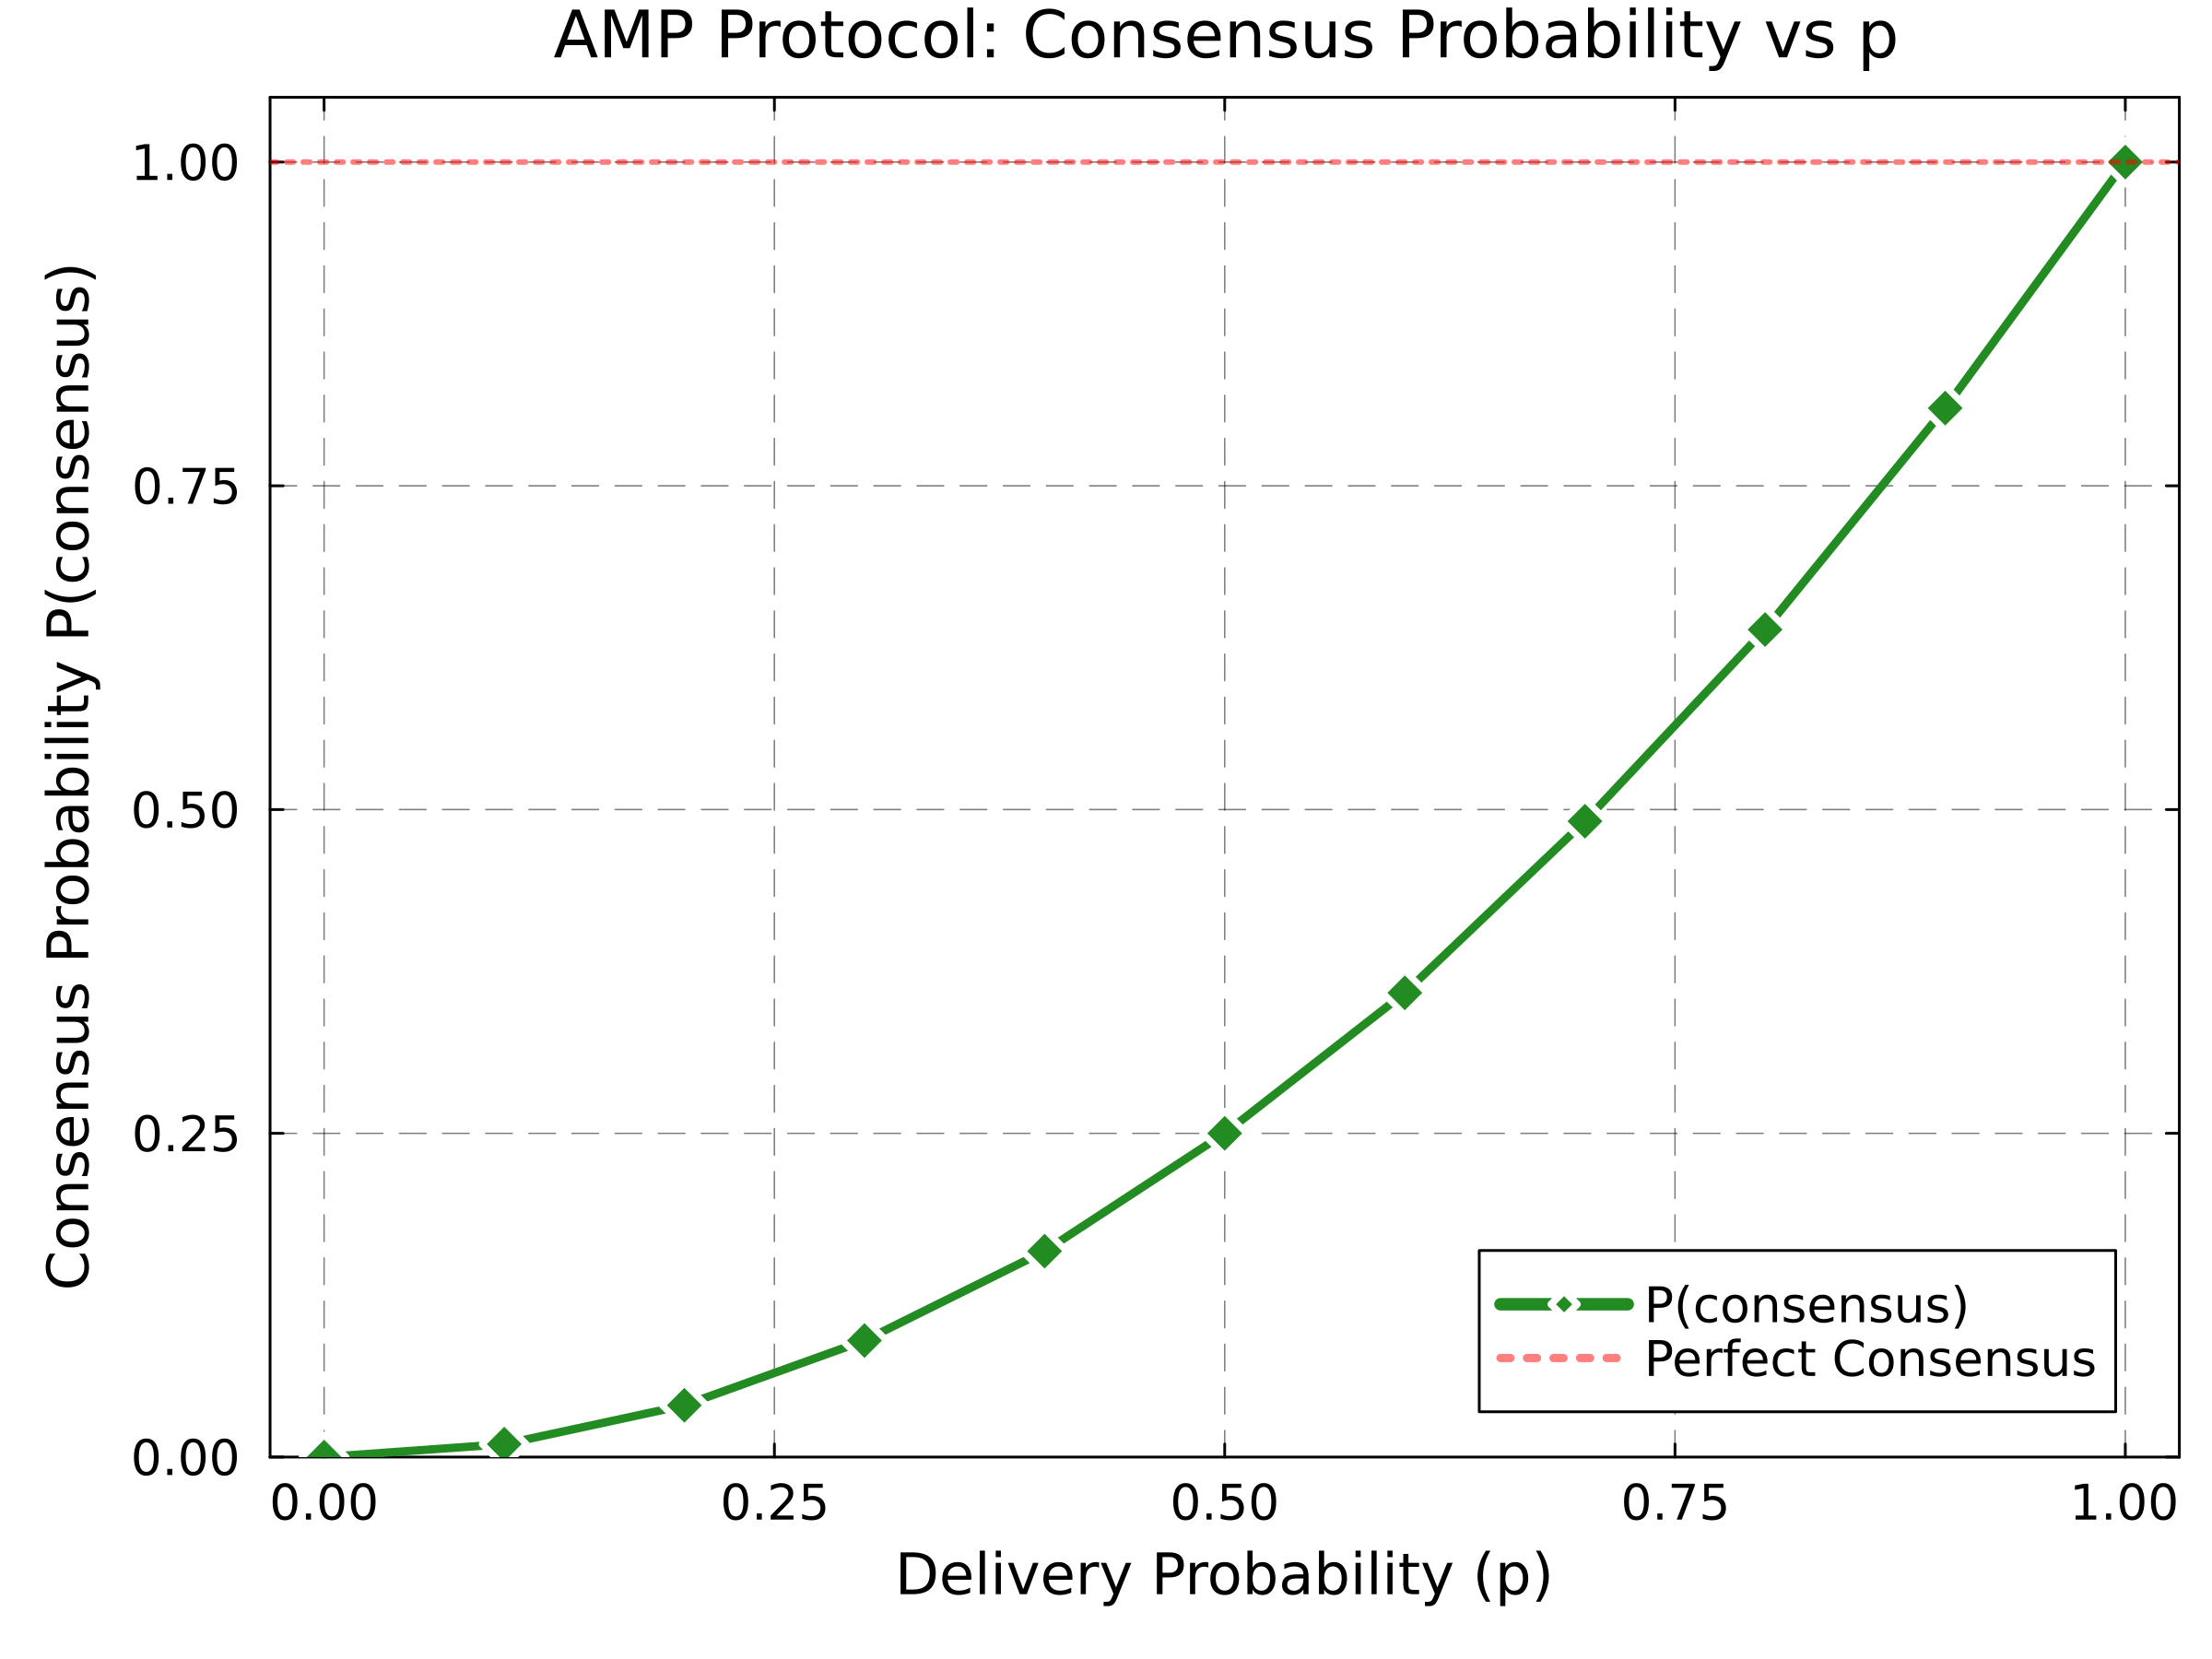

📊 Gráfica guardada en: amp_consensus.png


In [9]:
# Gráfica de P(consensus) vs p
plot_cons = plot_consensus_vs_p(results;
                                title="AMP Protocol: Consensus Probability vs p",
                                save_path="amp_consensus.png")
display(plot_cons)
